In [1]:
import matplotlib as mlp
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import Adam, rmsprop
from keras.utils.np_utils import to_categorical
import cv2
import sys
import os

Using TensorFlow backend.


In [2]:
train_dir = "D:/Learning/USF - Data Science Programming/Project Final/Level 2/train"
test_dir = "D:/Learning/USF - Data Science Programming/Project Final/Level 2/test"
categories = ["guide","regulatory","warning"]

In [3]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [4]:
trainval_data = []
IMG_SIZE = 64

def create_trainval_data():
    for category in categories:
        path = os.path.join(train_dir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_UNCHANGED)
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            new_img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            trainval_data.append([new_img_array, class_num])        

In [5]:
create_trainval_data()

In [6]:
test_data = []

def create_test_data():
    for category in categories:
        path = os.path.join(test_dir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_UNCHANGED)
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            new_img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            test_data.append([new_img_array, class_num])        

In [7]:
create_test_data()

In [8]:
import random
random.seed(42)
random.shuffle(trainval_data)

In [9]:
X = []
y = []

X_test = []
y_test = []

In [10]:
for features, labels in trainval_data:
    X.append(features)
    y.append(labels)

In [11]:
for features, labels in test_data:
    X_test.append(features)
    y_test.append(labels)

In [13]:
X = np.array(X)
y = np.array(y)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [14]:
print(X.shape)
print(y.shape)
print(X_test.shape)
print(y_test.shape)

(154, 64, 64, 3)
(154,)
(30, 64, 64, 3)
(30,)


In [15]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2)

In [17]:
train_datagen = ImageDataGenerator(rotation_range = 40,
                            width_shift_range = 0.2,
                            height_shift_range = 0.2,
                            rescale = 1. / 255,
                            shear_range = 0.2,
                            zoom_range = 0.2)

validation_datagen = ImageDataGenerator(rescale = 1. / 255)

test_datagen = ImageDataGenerator(rescale = 1. / 255)

In [18]:
train_datagen.fit(X_train)
validation_datagen.fit(X_valid)

In [19]:
test_datagen.fit(X_train)

In [20]:
y_train_categorical = to_categorical(y_train, 3)
y_valid_categorical = to_categorical(y_valid, 3)
y_test_categorical = to_categorical(y_test, 3)

In [22]:
channels = 3
train_img_size = len(X_train)
batch_size = 64
validation_img_size = len(X_valid)

In [23]:
X_train.shape

(123, 64, 64, 3)

In [26]:
# model = Sequential()

# model.add(Conv2D(32, (3,3), input_shape = (IMG_SIZE, IMG_SIZE, channels), activation = 'relu', data_format = 'channels_last'))
# model.add(MaxPooling2D(pool_size=(2,2), strides=2))

# model.add(Conv2D(64, (3,3), activation = 'relu'))
# model.add(MaxPooling2D(pool_size=(2,2), strides=2))

# model.add(Flatten())
# model.add(Dense(64))
# model.add(Activation('relu'))
# model.add(Dropout(0.375))
# model.add(Dense(3))
# model.add(Activation('softmax'))
          
# model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
# model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                802880    
_________________________________________________________________
activation_1 (Activation)    (None, 64)               

In [27]:
# history = model.fit(train_datagen.flow(X_train, y_train_categorical),
#                               validation_data=validation_datagen.flow(X_valid, y_valid_categorical),
#                                                                       epochs=50)

Epoch 1/50
4/4 [==============================] - 1s 161ms/step - loss: 1.0374 - accuracy: 0.4472 - val_loss: 0.7481 - val_accuracy: 0.5484
Epoch 2/50
4/4 [==============================] - 0s 96ms/step - loss: 0.6204 - accuracy: 0.7398 - val_loss: 0.4505 - val_accuracy: 0.8710
Epoch 3/50
4/4 [==============================] - 0s 104ms/step - loss: 0.4674 - accuracy: 0.7642 - val_loss: 0.3993 - val_accuracy: 0.8065
Epoch 4/50
4/4 [==============================] - 0s 100ms/step - loss: 0.4240 - accuracy: 0.8211 - val_loss: 0.2097 - val_accuracy: 0.9355
Epoch 5/50
4/4 [==============================] - 0s 103ms/step - loss: 0.3060 - accuracy: 0.8618 - val_loss: 0.3805 - val_accuracy: 0.8065
Epoch 6/50
4/4 [==============================] - 0s 108ms/step - loss: 0.2479 - accuracy: 0.8943 - val_loss: 0.1775 - val_accuracy: 0.9677
Epoch 7/50
4/4 [==============================] - 0s 104ms/step - loss: 0.3127 - accuracy: 0.8943 - val_loss: 0.3676 - val_accuracy: 0.8065
Epoch 8/50
4/4 [=====

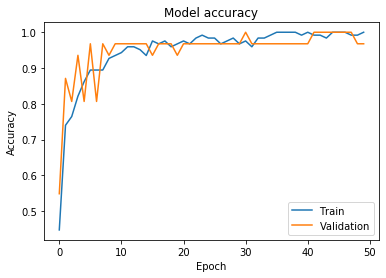

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [29]:
# model.save('latestmodell2.h5')

In [24]:
from keras.models import load_model

model = load_model('latestmodell2.h5')

In [25]:
score = model.evaluate(X_test, y_test_categorical)

30/30 [==============================] - 0s 6ms/step


In [26]:
score

[31.50433921813965, 0.9333333373069763]

In [29]:
print('Images with GUIDE SIGNS (eg. direction markers) are labelled as class ', categories.index('guide'))
print('Images with REGULATORY SIGNS (eg. stop, yield, do not enter) are labelled as class ', categories.index('regulatory'))
print('Images with WARNING SIGNS (eg. bump ahead, signal ahead) are labelled as class ', categories.index('warning'))

Images with GUIDE SIGNS (eg. direction markers) are labelled as class  0
Images with REGULATORY SIGNS (eg. stop, yield, do not enter) are labelled as class  1
Images with WARNING SIGNS (eg. bump ahead, signal ahead) are labelled as class  2


The random image label is  16


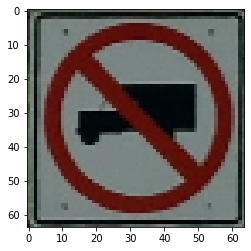

Predicted Class [1]


In [35]:
random_img = random.randint(0,29)
print("The random image label is ", random_img)
plt.imshow(X_test[random_img])
plt.show()
print('Predicted Class ' + str
         (model.predict_classes(X_test[random_img].reshape(1,64,64,3))))

In [27]:
y_pred = model.predict(X_test)

In [31]:
results_class = np.argmax(y_pred, axis=1, out=None)

In [32]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(results_class, y_test))

[[ 8  0  0]
 [ 0 10  0]
 [ 2  0 10]]


In [33]:
from sklearn.metrics import classification_report

print(classification_report(results_class, y_test))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       1.00      1.00      1.00        10
           2       1.00      0.83      0.91        12

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30

